In [1]:
## Importing Packages

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec
import scipy.stats as stats
import os

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier ,RandomForestClassifier ,GradientBoostingClassifier
from xgboost import XGBClassifier 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import roc_auc_score ,mean_squared_error,accuracy_score,classification_report,roc_curve,confusion_matrix
import warnings
warnings.filterwarnings('ignore')
from scipy.stats.mstats import winsorize
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

In [3]:
os.getcwd()

'C:\\Users\\SUNITA'

In [4]:
## Change directory
os.chdir("F:\\STOCKMRKT_PROJ")

In [5]:
## Read the CSV file from Pandas

In [6]:
stock_df=pd.read_csv("GOOG_StockData.csv",na_values=[""," ","N/A","NA"])

In [7]:
# Make a copy of the original sourcefile
stock_df1 = stock_df.copy()

In [8]:
## Data Decription and Exploratory Visualisation

In [9]:
# Dataset columns
stock_df1.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [10]:
stock_1=stock_df1.drop(['Date','Adj Close'],axis=1)

In [11]:
# Dataset header
stock_1.head()

,Open,High,Low,Close,Volume
0,597.280029,605.000000,590.219971,594.969971,2309500
1,603.280029,608.760010,600.729980,608.419983,2413400
2,608.369995,612.090027,599.849976,611.289978,1867600
3,607.200012,627.340027,603.130005,626.909973,2684800
4,632.000000,643.010010,627.000000,641.469971,1803600


In [12]:
rows = stock_df1.values.tolist()
X1=[]
for row in rows:
    X1.append(int(''.join(row[0].split('/'))))

In [13]:
s_1=pd.DataFrame({'Date':X1})

In [14]:
s_1

,Date
0,9292015
1,9302015
2,1012015
3,1022015
4,1052015
...,...
1254,9222020
1255,9232020
1256,9242020
1257,9252020


In [15]:
stockdf=s_1.join(stock_1,how='outer')

In [16]:
stockdf.head()

,Date,Open,High,Low,Close,Volume
0,9292015,597.280029,605.000000,590.219971,594.969971,2309500
1,9302015,603.280029,608.760010,600.729980,608.419983,2413400
2,1012015,608.369995,612.090027,599.849976,611.289978,1867600
3,1022015,607.200012,627.340027,603.130005,626.909973,2684800
4,1052015,632.000000,643.010010,627.000000,641.469971,1803600


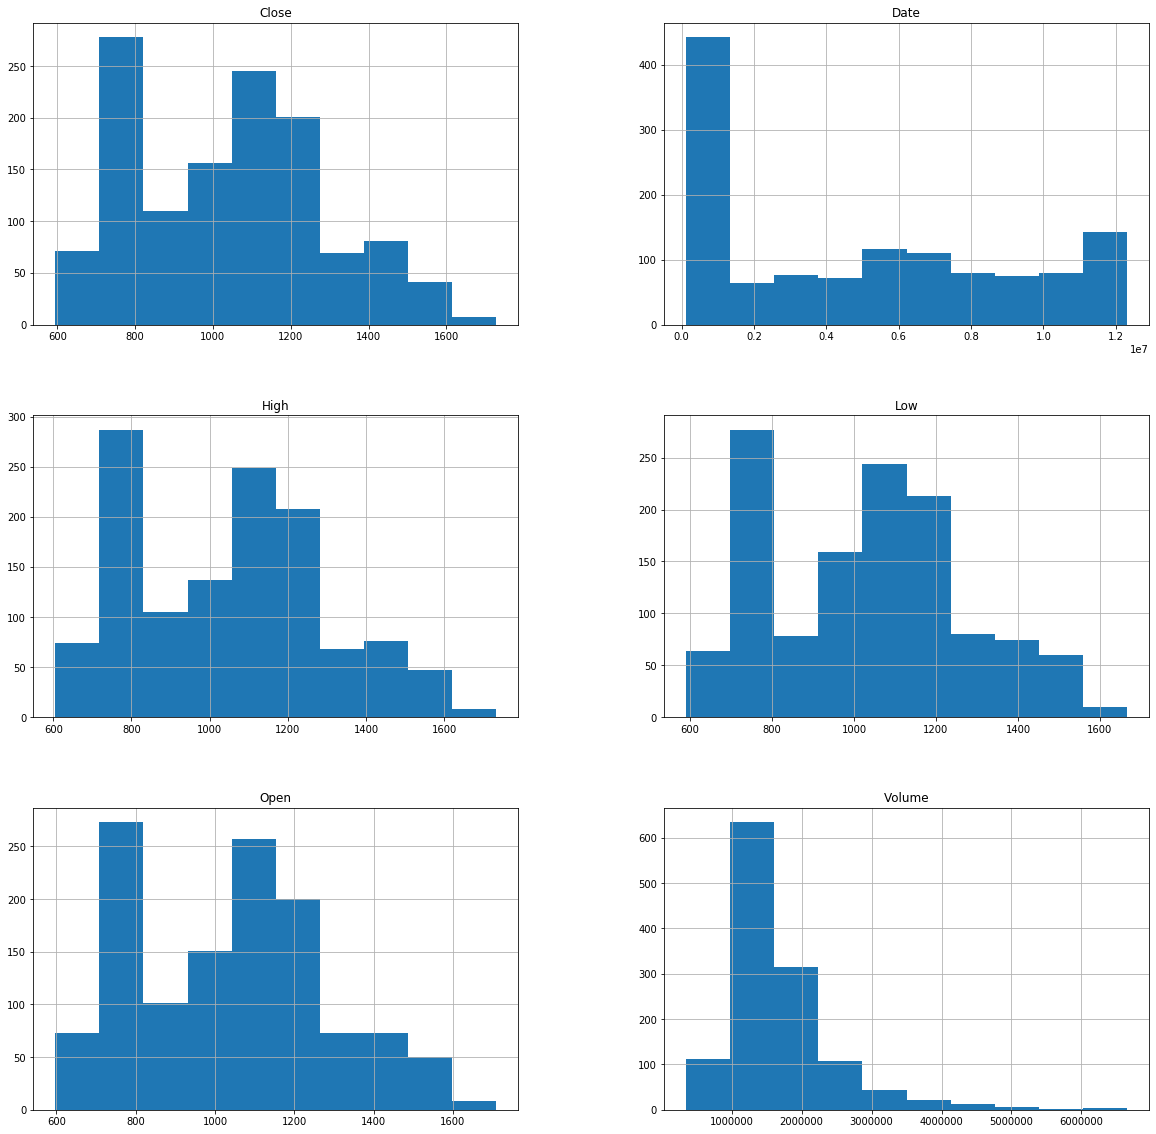

In [17]:
stockdf.hist(figsize=(20,20))
plt.show()

In [18]:
## plot the target variable to understand how it’s shaping up in our data:

In [19]:
## LINEAR REGRESSION

In [20]:
#y=b1x1+b2x2+b3x3+...bnxn
#b1,b2,b3..bn Beta Coefficients .Repr weights
#y=Dependent Variable
#x=Independent Variable

In [21]:
##The profit or loss calculation is usually determined by the closing price of a stock for the day, hence we will consider the closing price as the target variable. 

In [22]:
train=stockdf[:987]

In [23]:
valid=stockdf[987:]

In [24]:
X_train=train.drop('Close',axis=1)

In [25]:
y_train=train['Close']

In [26]:
X_valid=valid.drop('Close',axis=1)

In [27]:
y_valid=valid['Close']

In [28]:
## Implment linear Regression

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
model=LinearRegression()

In [31]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
#make predictions and find the rmse
preds = model.predict(X_valid)
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
rms

10.324888678680015

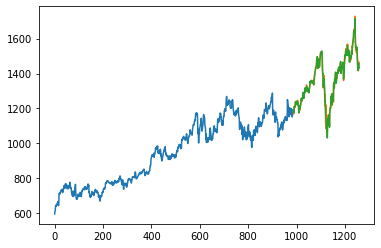

In [33]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = preds

valid.index = stockdf[987:].index
train.index = stockdf[:987].index

plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])

In [34]:
## Inference:Stock Price increases steadily with time.

In [35]:
!pip install xgboost

In [36]:
from sklearn.linear_model import LinearRegression 
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as XG
from xgboost import XGBRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Common sklearn Model Helpers
#from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

In [37]:
# selection of algorithms to consider and set performance measure
models = []
models.append(('Linear Regression', LinearRegression()))
models.append(('SVM',SVR()))
models.append(('Random Forest', RandomForestRegressor(n_estimators=100)))
models.append(('Decision Tree Regressor',
               DecisionTreeRegressor()))
models.append(('xgboost',
               XGBRegressor()))

In [38]:
acc_results = []
names = []
# set table to table to populate with performance results
col = ['Algorithm','Score Mean', 'Score STD']
df_results = pd.DataFrame(columns=col)
i = 0
# evaluate each model using cross-validation
for name, model in models:
    kfold = model_selection.KFold(
        n_splits=5, random_state=7)  # 10-fold cross-validation

    cv_score_results = model_selection.cross_val_score(  # accuracy scoring
        model, X_train, y_train, cv=kfold)

    acc_results.append(cv_score_results)
    names.append(name)
    df_results.loc[i] = [name,
                         round(cv_score_results.mean()*100, 2),
                         round(cv_score_results.std()*100, 2)
                         ]
    i += 1
df_results.sort_values(by=['Score Mean'], ascending=False)

,Algorithm,Score Mean,Score STD
0,Linear Regression,99.12,0.39
2,Random Forest,71.52,29.96
4,xgboost,67.11,33.40
3,Decision Tree Regressor,57.87,38.65
1,SVM,-4098.83,3719.74


In [39]:
# Random Forest Regressor

rg_rf = RandomForestRegressor(n_estimators=100)
rg_rf.fit(X_train,y_train)
y_pred_rf = rg_rf.predict(X_valid)


In [40]:
print("Accuracy of Random Forest Model:",rg_rf.score(X_valid,y_valid))

Accuracy of Random Forest Model: -0.34861997312588966


In [41]:
y_pred_rf = rg_rf.predict(X_valid)
y_pred_rf

array([1188.05639155, 1173.22678479, 1178.53728036, 1199.09229858,
       1206.05540891, 1203.6354041 , 1205.50018193, 1209.89339589,
       1231.2407972 , 1235.26029164, 1231.97008908, 1227.86720226,
       1224.38590594, 1237.42069208, 1234.1714856 , 1228.98689951,
       1227.70138415, 1228.56339114, 1238.4478978 , 1231.95559074,
       1221.34399787, 1214.1824048 , 1184.07189324, 1174.27508075,
       1198.94939452, 1211.83930533, 1195.35730476, 1203.7525904 ,
       1208.4155872 , 1225.53440809, 1220.15430048, 1236.23999153,
       1247.3038037 , 1259.32358276, 1253.72338621, 1252.76588994,
       1252.65359013, 1252.74858649, 1259.47608763, 1266.16377806,
       1279.4620752 , 1275.52478519, 1265.21188108, 1264.33007808,
       1265.02402113, 1275.11749396, 1275.11749396, 1275.02268926,
       1275.27218632, 1275.23229499, 1275.75588258, 1276.89888185,
       1275.19478152, 1277.88068607, 1277.7654871 , 1277.72268803,
       1277.76118901, 1277.72268803, 1275.75588258, 1277.72268

In [42]:
y_pred_rf.shape[0]

272

In [43]:
#Create a variable to predict 'x' days out in future
future_days=15
#Create a new column(target) shifted 'x' units/day up
stockdf['Prediction']=stockdf[['Close']].shift(-future_days)
print(stockdf.head())
print(type(stockdf))

      Date        Open        High         Low       Close   Volume  \
0  9292015  597.280029  605.000000  590.219971  594.969971  2309500   
1  9302015  603.280029  608.760010  600.729980  608.419983  2413400   
2  1012015  608.369995  612.090027  599.849976  611.289978  1867600   
3  1022015  607.200012  627.340027  603.130005  626.909973  2684800   
4  1052015  632.000000  643.010010  627.000000  641.469971  1803600   

   Prediction  
0  650.280029  
1  642.609985  
2  651.789978  
3  702.000000  
4  712.780029  
<class 'pandas.core.frame.DataFrame'>


In [44]:
# Get the last 'x' rows of feature dataset
x_future=stockdf[:-future_days]
x_future=x_future.tail(future_days)
x_future=np.array(x_future)
x_future

array([[8.17202000e+06, 1.51467004e+03, 1.52560999e+03, 1.50796997e+03,
        1.51797998e+03, 1.37830000e+06, 1.53239001e+03],
       [8.18202000e+06, 1.52618005e+03, 1.56246997e+03, 1.52370996e+03,
        1.55859998e+03, 2.02710000e+06, 1.55695996e+03],
       [8.19202000e+06, 1.55331006e+03, 1.57368005e+03, 1.54394995e+03,
        1.54753003e+03, 1.66060000e+06, 1.53202002e+03],
       [8.20202000e+06, 1.54344995e+03, 1.58587000e+03, 1.53819995e+03,
        1.58175000e+03, 1.70690000e+06, 1.52071997e+03],
       [8.21202000e+06, 1.57703003e+03, 1.59771997e+03, 1.56800500e+03,
        1.58042004e+03, 1.44650000e+06, 1.51928003e+03],
       [8.24202000e+06, 1.59397998e+03, 1.61417004e+03, 1.58056995e+03,
        1.58819995e+03, 1.40990000e+06, 1.54143994e+03],
       [8.25202000e+06, 1.58206995e+03, 1.61162000e+03, 1.58206995e+03,
        1.60821997e+03, 2.24710000e+06, 1.52090002e+03],
       [8.26202000e+06, 1.60800000e+03, 1.65921997e+03, 1.60359998e+03,
        1.65238000e+03, 3

In [45]:
## K-Nearest Neighbours

In [46]:
# Make a copy of the original sourcefile
stock_KNN = stock_df.copy()

In [47]:
#importing libraries
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [48]:
#scaling data
X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)
X_valid_scaled = scaler.fit_transform(X_valid)
X_valid = pd.DataFrame(X_valid_scaled)

#using gridsearch to find the best parameter
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)

#fit the model and make predictions
model.fit(X_train,y_train)
preds = model.predict(X_valid)

In [49]:
## Results-RMSE

In [50]:
#rmse
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
rms

438.2956054956993

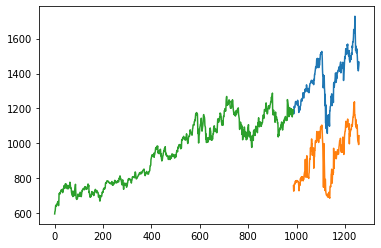

In [51]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(valid[['Close', 'Predictions']])
plt.plot(train['Close'])

In [52]:
## drop in 2018-2019 and then rise